Repair

# Cleaning

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
from sklearn.utils import shuffle
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the dataframe from a csv file
df = pd.read_csv('train.csv', delimiter=';')


In [4]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
# Replace the values in the target column with string '0' and '1'.
df['y'] = df['y'].str.replace('no', '0')  
df['y'] = df['y'].str.replace('yes', '1')   

# Convert to integer
df['y'] = df['y'].astype(int)

In [6]:

# Dropping the rows with NaN values 
df.dropna( inplace=True)

# Plots for creating feature importance plot

In [18]:
auc_df = pd.read_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_Resultsxde.xlsx')


In [19]:
auc_df.head(10)

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,X_fit Size,F1 (%),F1 (%)_std,AUC (%),AUC (%)_std
0,0,RF_default_mean_of_iterations,5,0,0,31647,0.499334,0.006375,0.688538,0.003217
1,1,LR_default_mean_of_iterations,5,0,0,31647,0.450947,0.000000,0.661184,0.000000
2,2,DT_default_mean_of_iterations,5,0,0,31647,0.481834,0.004478,0.713859,0.003499
3,3,DT_sample:3164_cf:1_mean_of_5_iterations,5,3164,1,34811,0.465093,0.009353,0.695605,0.006000
4,4,DT_sample:3164_cf:2_mean_of_5_iterations,5,3164,2,37975,0.458800,0.007639,0.689100,0.004611
5,5,DT_sample:6328_cf:1_mean_of_5_iterations,5,6328,1,37975,0.483288,0.015447,0.707099,0.010623
6,6,DT_sample:6328_cf:2_mean_of_5_iterations,5,6328,2,44303,0.478150,0.009334,0.702314,0.005726
7,7,DT_sample:9492_cf:1_mean_of_5_iterations,5,9492,1,41139,0.491550,0.006306,0.715329,0.003446
8,8,DT_sample:9492_cf:2_mean_of_5_iterations,5,9492,2,50631,0.493707,0.004715,0.713202,0.003096


In [20]:
# Get the AUC score for the LR default model
lr_default_auc =  auc_df[auc_df['Model'].str.startswith('DT_default')]['AUC (%)'].iloc[0]
auc_scores = auc_df['AUC (%)'][3:].tolist()

rf_default_auc =  auc_df[auc_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]



In [21]:
from scipy.stats import ks_2samp
import pandas as pd

def ks_test_all_features(original_df, cf_df):
    results = {}
    # Iterate over columns in the original dataframe
    for column in original_df.columns:
        # Check if the column exists in the counterfactual dataframe and both columns are not empty
            # Apply the KS test
        stat, p_value = ks_2samp(original_df[column].dropna(), cf_df[column].dropna())
        results[column] = {'KS Statistic': stat}

    return results


In [22]:
list_1 = [3164, 6328, 9492]
list_2 = [1, 2]

list_3 = [1,2,3,4,5] #iterations

In [23]:
ks_results_list = [] 
for i in list_1:
    for t in list_2:
        for z in list_3:
            df_cf = pd.read_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(i,t, z), index_col=0)
            start_index = 1 + len(df)  # Calculate the starting index
            new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
            df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
            df_cf_reset.index = new_index  # Set the new index
            df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
            ks_results = ks_test_all_features(df, df_cf)
            ks_results_df = pd.DataFrame(ks_results).T
            mean_ks_statistic = ks_results_df['KS Statistic'].mean()
            ks_results_list.append(mean_ks_statistic)

In [24]:
ks_results_list

[0.10904843545484834,
 0.1087002708141665,
 0.10840639085844624,
 0.10767629494863823,
 0.10662115586607757,
 0.10783713198678377,
 0.10829334478052495,
 0.10798065969045399,
 0.10873304270999266,
 0.1084195960470367,
 0.10309611090765858,
 0.10276322028558041,
 0.10383105567636156,
 0.10243435896799126,
 0.10323020222159955,
 0.10331186580131088,
 0.1038387526204625,
 0.10346153975180916,
 0.10383023499111035,
 0.10354814892908781,
 0.10100913925787375,
 0.10254262849257853,
 0.10087160475997221,
 0.10055738576396721,
 0.10197839578264163,
 0.1017830561756595,
 0.10148253630775017,
 0.1010993614515111,
 0.10159913509028265,
 0.10143385581778556]

getting the average of every iteration

In [25]:
# Create a new list that gets the means of every 5 number
new_list = [(ks_results_list[i] + ks_results_list[i + 1]+ ks_results_list[i + 2] + ks_results_list[i + 3] + ks_results_list[i + 4] ) / 5 for i in range(0, len(ks_results_list) - 1, 5)]


# Print the new list
print(new_list)
ks_results_list = new_list.copy()

[0.10809050958843539, 0.10825275504295842, 0.10307098961183828, 0.10359810841875614, 0.10139183081140668, 0.1014795889685978]


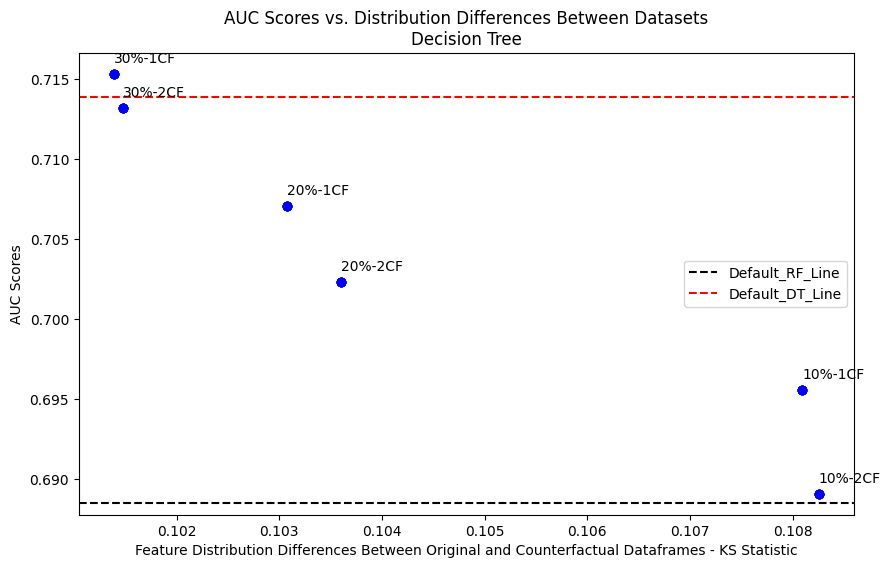

In [26]:

labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF']

## Show the plot
plt.figure(figsize=(10, 6))

# Plotting AUC differences
for i, label in enumerate(labels):
    plt.scatter(ks_results_list, auc_scores, color='blue')  # You can customize the color and marker
    plt.annotate(label, (ks_results_list[i], auc_scores[i]),
                 textcoords="offset points", xytext=(0,8), ha='left')


plt.axhline(y=rf_default_auc, color='k', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
plt.axhline(y=lr_default_auc, color='r', linestyle='--', label="Default_DT_Line")  # Plot RF_line as a horizontal line

# Add labels, title, and legend
plt.title('AUC Scores vs. Distribution Differences Between Datasets\nDecision Tree')
plt.xlabel('Feature Distribution Differences Between Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Scores')
plt.legend()

# Show the plot
plt.show()

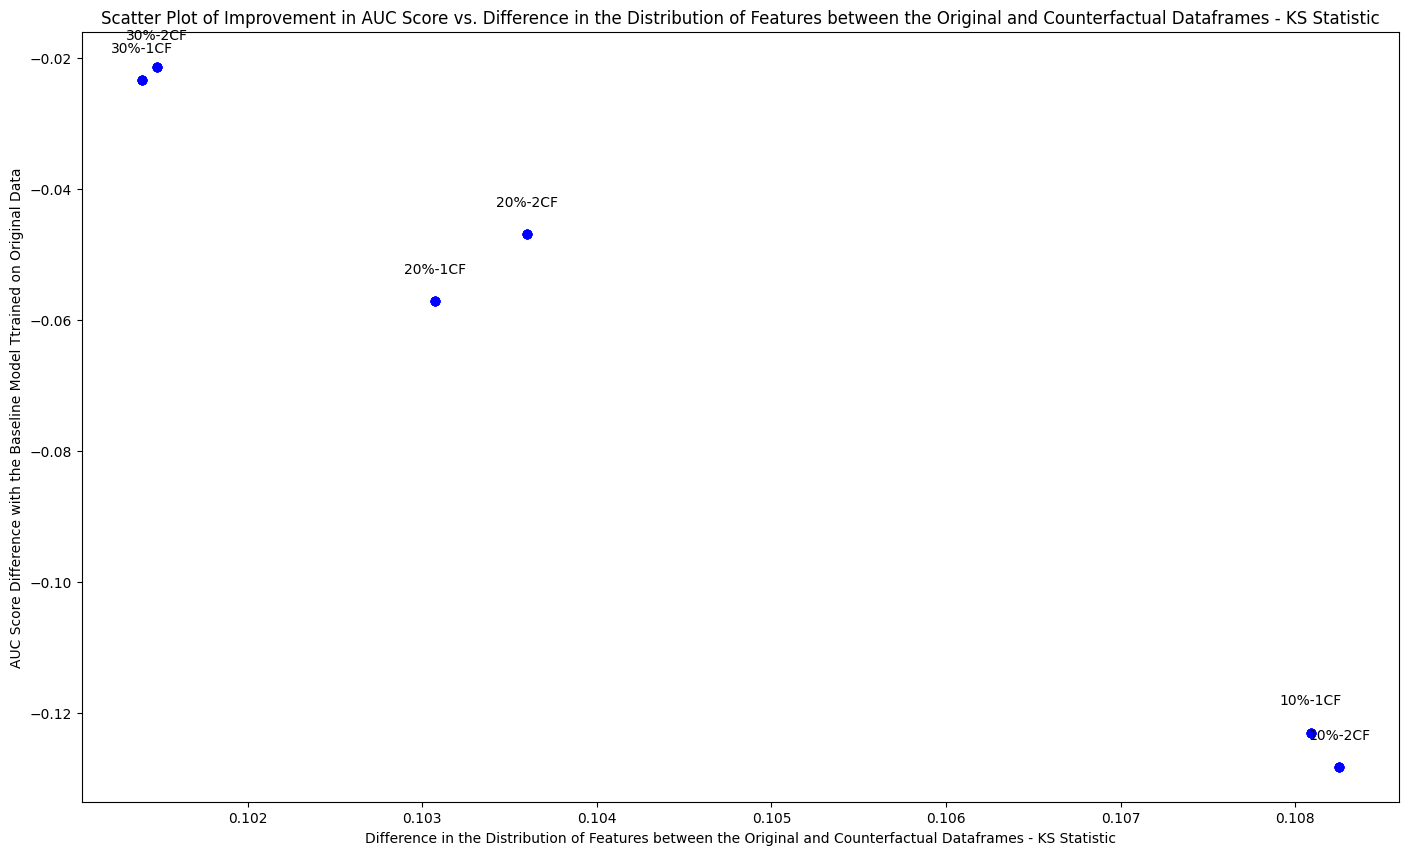

In [17]:

# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_cf, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_cf[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()